In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

CMAP = plt.cm.coolwarm

plt.set_cmap(CMAP);

TEST_SIZE = 0.2 # test size
EPOCHS =10000 #number of epochs
ALPHA = 0.01 #learning rate


<Figure size 640x480 with 0 Axes>

In [7]:
X , y = datasets.make_moons(n_samples=1000,noise=0.2,random_state=RANDOM_STATE)

In [8]:
data_df = pd.DataFrame(X,columns=['x1','x2'])
data_df['target'] = y
data_df.head()

,x1,x2,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='x1', ylabel='x2'>

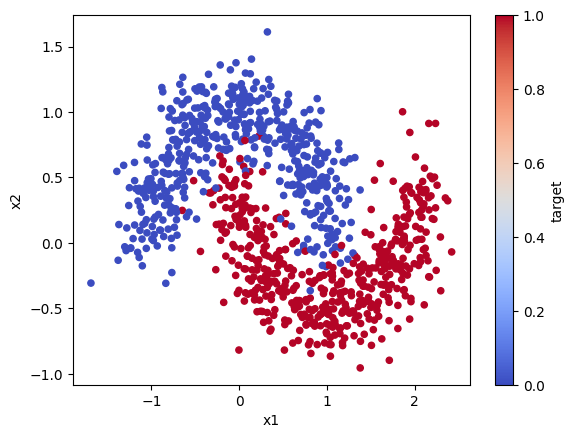

In [9]:
data_df.plot(x='x1',y='x2',kind='scatter',c = 'target',cmap = CMAP)

In [10]:
data_train,data_test = data_df.values[:900],data_df.values[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [11]:
def fn_sigmoid(z):
    return 1 /(1+np.exp(-z))

/* over to perceptron  /*

In [12]:
def predict(row,wt):
    
    z=wt[0]
    
    for i in range(len(row)-1):
        
        z += wt[i+1]*row[i]
    #print(z)
    a = fn_sigmoid(z)
    return a

In [13]:
weights = [0.1,2.0,1.0]

predict(data_df.loc[0],weights)

0.9434999754763397

In [15]:
data_df.loc[0]

0.1+0.906340*2+0.902676*1.0

2.8153560000000004

In [16]:
def train_weight(train,alpha,n_epoch):
    
    errors =[]
    weights = np.random.rand(train.shape[1])
    m = train.shape[0]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            pred = predict(row,weights)
            dz = pred - row[-1]
            error = -row[-1]*np.log(pred)
            sum_error = sum_error + error
            
            weights[0] = weights[0] -alpha*dz/m
            
            for i in range(len(row)-1):
        
                weights[i+1] = weights[i+1] -alpha*dz*row[i]/m
                
            #print(weights)
            
        errors.append(sum_error)    
    
    return errors,weights

In [17]:
errors,weights =  train_weight(data_train,alpha=0.01,n_epoch=2000)

weights

array([-0.2410636 ,  1.22081713, -1.58524272])

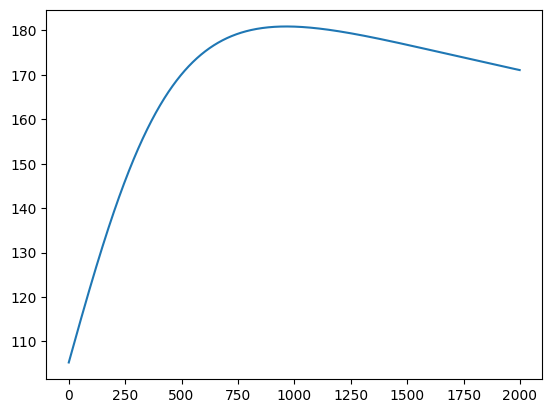

In [19]:
fig,ax = plt.subplots()
ax.plot(errors)

In [14]:
def fn_pred_class(pred):
    return 1 if pred >= 0.5 else 0

In [15]:
y_pred = []

for row in data_train:
    pred =predict(row,weights)
    y_pred.append(fn_pred_class(pred))
y_pred        

accuracy_score(data_train[:,-1],y_pred)

0.8233333333333334

In [16]:
y_pred = []

for row in data_test:
    pred =predict(row,weights)
    y_pred.append(fn_pred_class(pred))
y_pred        

accuracy_score(data_test[:,-1],y_pred)

0.89

In [17]:
cm = confusion_matrix(data_test[:,-1],y_pred)

cm

array([[54,  4],
       [ 7, 35]])

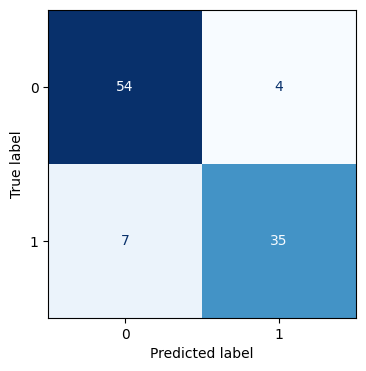

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

fig,ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax ,cmap = 'Blues',colorbar=False)

plt.show();

In [19]:
x_min,x_max = X[:,0].min()-0.01,X[:,0].max()+0.01
y_min,y_max = X[:,1].min()-0.01,X[:,1].max()+0.01

dm = 0.05
xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]
print(XX.shape)
XX = np.hstack((XX,np.ones((XX.shape[0],1))))


y_pred = []

for row in (XX):
    y_p = fn_pred_class(predict(row,weights))
    y_pred.append(y_p)
    
Z = np.array(y_pred).reshape(xx.shape)  
print (Z.shape)  

(4316, 2)
(52, 83)


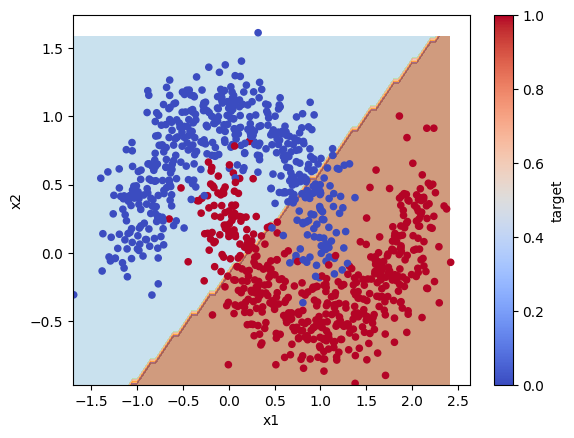

In [20]:
fig,ax =plt.subplots()

ax.contourf(xx,yy,Z,alpha=0.6,cmap = plt.cm.Paired)

data_df.plot(x = 'x1',y = 'x2',kind = 'scatter',ax = ax,c ='target',cmap =CMAP);